   # Heart disease diagnosis Classfier
   



#### Import libraies and Dataset

In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading heartDisease Training data set
X_train=pd.read_csv("D:/freeLancing/mini_Final_ML_Project/X_Train.csv")
Y_train=pd.read_csv("D:/freeLancing/mini_Final_ML_Project/y_train.csv")
X_test=pd.read_csv('D:/freeLancing/mini_Final_ML_Project/X_test.csv')

In [3]:
# Viewing top two rows of the training dataframe
X_train.head(2)

,id,patient_no,cast,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med
0,122283168,113223627,Caucasian,Female,[80-90),?,1,1,7,4,...,No,No,No,No,No,No,No,No,No,Yes
1,97835454,25776306,Caucasian,Female,[80-90),?,5,3,17,3,...,No,No,Steady,No,No,No,No,No,No,Yes


In [4]:
X_test.head(2)

,id,patient_no,cast,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med
0,39768600,23591763,Caucasian,Male,[80-90),?,5,3,17,7,...,No,No,No,No,No,No,No,No,No,Yes
1,123779322,77857263,Caucasian,Female,[90-100),[50-75),1,3,5,6,...,No,No,No,No,No,No,No,No,No,No


In [5]:
#Combinig Train and test dataset

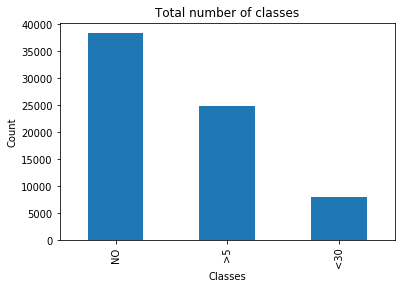

In [6]:
fig=plt.figure()
p=Y_train['label'].value_counts()
p.plot.bar()
plt.xlabel("Classes")
plt.ylabel('Count')
plt.title("Total number of classes")
plt.show()

In [7]:

print('Training dataset shape =',X_train.shape)
print('Testing  dataset shape =',X_test.shape)

# X_train=X_train.append(X_test, ignore_index=True)
# print('Combine dataset shape  =', X_train.shape)

Training dataset shape = (71236, 49)
Testing  dataset shape = (30530, 49)


# Preprocessing the data

In this section, I will preprocess the training data, such as Remove missing values and Dimension reduction etc. 

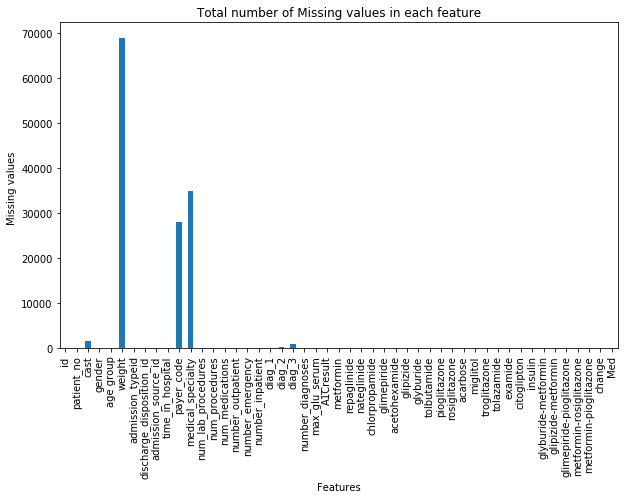

In [8]:
# Number of question-marks in the datasets.
def plotingMissingValues(dataframe):
    question_mark=(dataframe == "?").sum()
    fig=plt.figure(figsize=(10,6), )
    question_mark.plot('bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values ")
    plt.title("Total number of Missing values in each feature")
    return plt.show()
plotingMissingValues(X_train)



## 1-Filling missing values

*Droping Weight columns, because it has greater amount of courpt values, as we can see in above graph*

In [9]:
X_train=X_train.drop("weight", axis=1)

*The cast column has 1620 question marks, so I have replaced those question marks with "Other" keyword*

In [10]:
# Now removing missing values from CAST columns
X_train['cast']=X_train["cast"].replace("?", "Other")
print("The uniques labels of cast features are ",X_train['cast'].unique()) 

The uniques labels of cast features are  ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']


In [11]:
# Appending Y labels with Training dataframe

train_target=X_train.copy()
train_target['label']=Y_train

*Removing Null rows from Three features given below:*

In [12]:
#Replacing the ? with null values, so that i can easliy remove those null rows.
train_target['diag_3']=train_target['diag_3'].replace('?',np.nan)
train_target['diag_1']=train_target['diag_1'].replace('?',np.nan)
train_target['diag_2']=train_target['diag_1'].replace('?',np.nan)

In [13]:
train_target=train_target.dropna(subset=['diag_2','diag_1','diag_3'])

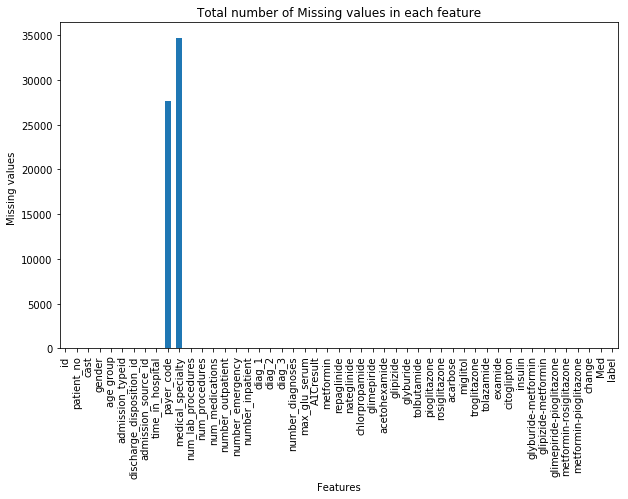

In [14]:
plotingMissingValues(train_target)

In [15]:
#Only Two columns are remaining to fill

# Placing NaN in two columns belows:

train_target['payer_code']=train_target["payer_code"].replace("?",np.nan )

train_target['medical_specialty']=train_target["medical_specialty"].replace("?",np.nan )


This graph shows that no value is missing



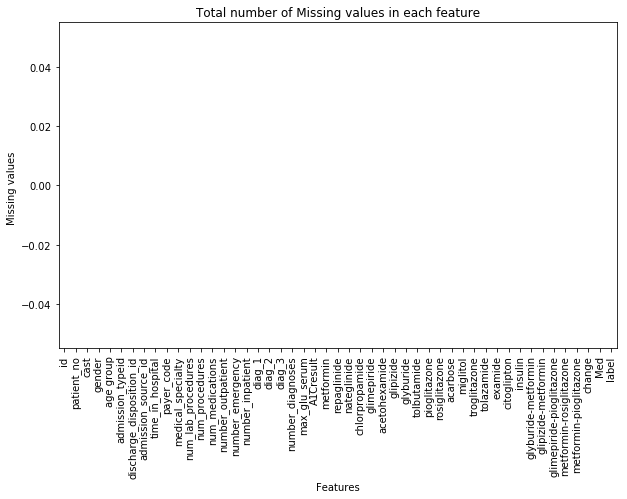

In [16]:
print("This graph shows that no value is missing\n")
plotingMissingValues(train_target)


## 2- Converting all columns into Integers

In [17]:
# Combining complete training and test dataset
print(" Shape of training dataset = ",train_target.shape)
print(" Shape of testing dataset = ",X_test.shape)
X_test_new=X_test.copy()
# X_test_new=X_test_new.drop('weight', axis=1)
# full_train_test=train_target.append(X_test_new, ignore_index=True )

# print("Shape of Complete dataset = ",full_train_test.shape)


 Shape of training dataset =  (70224, 49)
 Shape of testing dataset =  (30530, 49)


In [18]:
train_target.head(2)

,id,patient_no,cast,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,122283168,113223627,Caucasian,Female,[80-90),1,1,7,4,MC,...,No,No,No,No,No,No,No,No,Yes,NO
1,97835454,25776306,Caucasian,Female,[80-90),5,3,17,3,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO


In [19]:
from sklearn import preprocessing

#Finding the columns of dataType =' object'
traning_object_columns = train_target.select_dtypes(['object']).columns

#Function to convert object data type to integer
def convertToNumerical(dataframe,column):
    le = preprocessing.LabelEncoder()
    le.fit(dataframe[column].astype("str"))
    return le.transform(dataframe[column].astype("str") )
    


# Converting training dataset to numerical
for i in traning_object_columns:
    train_target[i]=convertToNumerical(train_target,i)

print("All the features of the training dataset is converted into Int type ")


All the features of the training dataset is converted into Int type 


In [20]:
train_target['medical_specialty']=train_target['medical_specialty'].replace(68,np.nan)
train_target['payer_code']=train_target['payer_code'].replace(17,np.nan)


In [21]:
from sklearn.impute import SimpleImputer
def imputers(data):
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(data)
    
    return imp.transform(data)
x=imputers(np.array(train_target['payer_code']).reshape(-1,1))
train_target['payer_code']=np.int32(x.reshape(-1,))
y=imputers(np.array(train_target['medical_specialty']).reshape(-1,1))
train_target['medical_specialty']=np.int32(y.reshape(-1,))
train_target['medical_specialty'].isnull().sum()

0

In [22]:
# separting target labels from training dataset. and reshaping into 2dim
Y_array_label= train_target['label'].copy()
target_array = train_target['label']
target_array = np.array(target_array)

target_array = target_array.reshape(-1,1)



In [23]:
Y_array_label.head(10)

0    2
1    2
2    0
3    2
4    2
5    1
6    1
7    1
8    2
9    2
Name: label, dtype: int32

In [24]:
x_train_array=train_target.drop("label", axis=1)

In [25]:
# train_array=full_train_test.iloc[:70224,]
# test_array=full_train_test.iloc[70224:,]


## 3 - Recursively Eliminating Features

 *I use scikit-learn’s RFECV to conduct recursive feature elimination (RFE) using crossvalidation
(CV).*

In [26]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
ols=DecisionTreeClassifier()

# Recursively eliminate features
rfecv = RFECV(estimator=ols,verbose=1 )

rfecv.fit(x_train_array, target_array)

print("Feature selection process has been completed")                           
        
                                   

Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 fe

In [27]:
selected_features=rfecv.transform(x_train_array)
print("Original number of feature are 49")
print( "selected number of featurs are",rfecv.n_features_)


Original number of feature are 49
selected number of featurs are 14


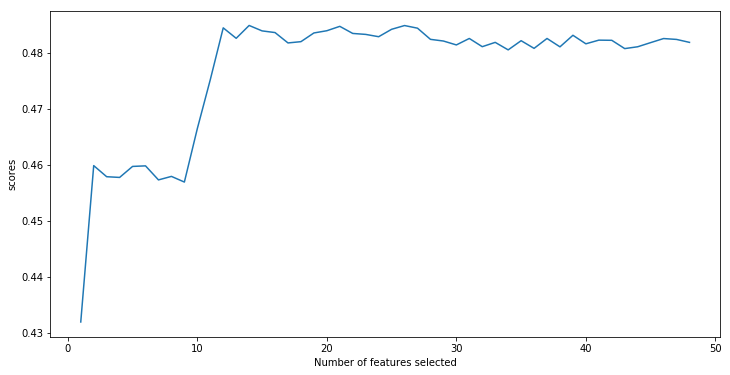

In [28]:
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('scores')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [29]:
print("Following matrix shows:\n")
print("True = Selected \nFalse = Not Selected")
selected_features_name=pd.DataFrame(rfecv.support_,index=x_train_array.columns ,columns=['Rank'])


Following matrix shows:

True = Selected 
False = Not Selected


In [30]:
# Converting test dataset into numerical form.
traning_object_columns = X_test.select_dtypes(['object']).columns

for i in traning_object_columns:
    X_test[i]=convertToNumerical(X_test,i)

# test_array_selected=test_array.iloc[:,[0,1,2,4,5,6,7,8,9,11,12,13,14,16,17,19,21,22,23,24,25,26,27,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]]

In [31]:
rows=[]
for col in selected_features_name:
    rows = list(selected_features_name[col][selected_features_name[col] == True].index)
#     for row in rows:
#  
testdata=pd.DataFrame()
for col in rows:
    testdata[col]=X_test[col]


In [32]:
testdata.head(4)

,id,patient_no,age group,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses
0,39768600,23591763,8,3,7,55,22,1,13,0,240,216,204,5
1,123779322,77857263,9,3,6,0,65,0,14,1,235,219,337,9
2,109172814,24670386,5,1,4,19,44,1,16,1,235,75,206,5
3,194633244,48119247,6,1,5,0,37,6,27,0,224,206,410,9


In [33]:
testdata.shape

(30530, 14)

#  Machine Learning algorithms

 5 Algorithm are used to in this project

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Models=[LogisticRegression,GaussianNB,SGDClassifier,DecisionTreeClassifier,RandomForestClassifier]
adaboos=AdaBoostClassifier()
graBoos=GradientBoostingClassifier()
log_clf = LogisticRegression( verbose=1, random_state=1)
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
Gau_clf=GaussianNB()
De_Tree_clf=DecisionTreeClassifier(random_state=1)
ggd_clf=SGDClassifier()
linearDiscri=LinearDiscriminantAnalysis()

In [35]:
target_array=target_array.reshape(-1)
target_array.shape

(70224,)

In [36]:

voting_clf = VotingClassifier(
estimators=[('linearD',linearDiscri),('lr', log_clf), ('rf', rnd_clf),('gaussain',Gau_clf),('decision',De_Tree_clf),('sgd',ggd_clf)
           ],
voting='hard')

voting_clf.fit(selected_features,target_array)

# ,('ada',adaboos),('gra',graBoos)

[LibLinear]

VotingClassifier(estimators=[('linearD', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [37]:
prediction=voting_clf.predict(selected_features)

In [38]:
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn import metrics
print('Accuracy score = ',accuracy_score(target_array,prediction))

Accuracy score =  0.8952922077922078


#### Let’s look at each classifier’s accuracy on the test set:

In [40]:
for clf in (log_clf, rnd_clf,Gau_clf,De_Tree_clf,ggd_clf,linearDiscri, voting_clf):
    clf.fit(selected_features,target_array)
    y_pred = clf.predict(selected_features)
    print( clf.  __class__.__name__ , accuracy_score(target_array, y_pred))

[LibLinear]LogisticRegression 0.5405986557302347
RandomForestClassifier 0.9883088402825245
GaussianNB 0.5368819776714514
DecisionTreeClassifier 1.0
SGDClassifier 0.5368819776714514
LinearDiscriminantAnalysis 0.5684523809523809
[LibLinear]VotingClassifier 0.6542919799498746


In [ ]:
print(metrics.confusion_matrix(target_array,prediction))

In [ ]:
plt.scatter(target_array,prediction)

In [ ]:
print(f1_score(target_array,prediction, average='macro'))

print(f1_score(target_array,prediction, average='micro'))

print(f1_score(target_array,prediction, average='weighted'))

print(f1_score(target_array,prediction, average=None))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(target_array,prediction,target_names=['<30','>5','NO']))

In [ ]:
prediction=voting_clf.predict(testdata)

In [ ]:
# Id=np.arange(1,30531)
# myprediction=pd.DataFrame(Id , columns = ['Id'], index=None)
# myprediction['label'] = prediction
# # myprediction.head(5)


In [ ]:
# Selected_test_data=pd.DataFrame(testdata , columns =testdata.columns , index=None)

In [ ]:
# Selected_test_data.to_csv("D:/freeLancing/mini_Final_ML_Project/Selected_test_data.csv", index=False)


In [ ]:
# myprediction['label']=myprediction['label'].replace(2, 'NO')
# myprediction['label']=myprediction['label'].replace(0,'<30')
# myprediction['label']=myprediction['label'].replace(1,'>5')
# myprediction.head(5)

In [ ]:
# myprediction.to_csv("D:/freeLancing/mini_Final_ML_Project/myPredictions.csv", index=False)


In [ ]:
# grid_result=voting_clf

In [ ]:
# import pickle
# pkl_filename = "D:/freeLancing/mini_Final_ML_Project/heartDiseaseModel.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(grid_result, file)

# ---------------------------------------------------------------------------------------